In [1]:
import numpy as np
import MigPreFuncoes
from scipy.fft import fft,rfft, rfftfreq, irfft
import matplotlib.pyplot as plt

Imported MigPreFuncoes now


In [2]:
x = np.ones([11,11])
y = MigPreFuncoes.phase_shift(x)

In [3]:
y.shape

(11, 11)

In [4]:
t = np.linspace(0,np.pi,91)
s = np.sin(2*t)

In [5]:
S = rfft(s)

print(S.shape)

(46,)


In [6]:
s2 = irfft(S)
print(s2.shape)

(90,)


TTh.shape=(240, 120, 240)


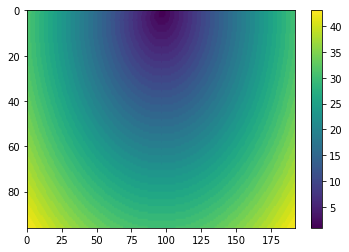

TSX.shape=(120, 240)


In [8]:
dx=0.8 #(m) Discretização em X
dz=0.8 #(m) Discretização em Y
#dt=0.8 #(s)
nt=nz=120 #Tamanho do Grid em 
ntr=nx=240
c=250 #m/s

with open('Data/time_table_barra.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

dt=0.004

TSX = (TTh[120,:,:]/dt+1).astype(int)  # Traveltime  (indexes)
plt.imshow(TSX,extent=[0, ntr*dx, nz*dz, 0], aspect='auto')
plt.colorbar()
plt.show()

timer=np.round(TTh/dt)+1

print(f"TSX.shape={TSX.shape}")

In [253]:
def peso(TTh,dt,igx,isx):
    """
    Calcula a função peso w(s,x,r)
    Entrada:
    TTh - tabela do tempo de trânsito calculada com a função raymodel3
    dt - discretização do tempo (s)
    X - componente X da normal do modelo; X = np.sin(m_theta); X.shape = [nz,nx]
    Y - componente Y da normal do modelo; Y = np.cos(m_theta); Y.shape = [nz,nx]
    igx - posição do receptor 
    isx - posição da fonte
    Saída:
    w - função peso (w.shape=[nz,nx])
    """
    
    #timer=np.round(TTh/dt)+1

    timer = TTh
    gH = np.gradient(timer, axis=2) #gradiente horizontal  #diferença entre colunas (do modelo de velocidade)
    gV = np.gradient(timer, axis=1) #gradiente vertical    #diferença entre linhas

    
    prV = gV[igx,:,:] #gV[igx,iz,ix]
    prH = gH[igx,:,:] 

    psV = gV[isx,:,:] 
    psH = gH[isx,:,:] 

    pH = psH + prH
    pV = psV + prV
    
    return psV,psH,prV,prH


In [254]:
psV,psH,prV,prH = peso(TTh,dt,60,60)

x = np.linspace(0, ntr*dx,ntr)
z = np.linspace(0, nz*dz,nz)
[X,Z] = np.meshgrid(x,z)

print(X.shape,Z.shape,psV.shape,psH.shape)
Z

(120, 240) (120, 240) (120, 240) (120, 240)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80672269,  0.80672269,  0.80672269, ...,  0.80672269,
         0.80672269,  0.80672269],
       [ 1.61344538,  1.61344538,  1.61344538, ...,  1.61344538,
         1.61344538,  1.61344538],
       ...,
       [94.38655462, 94.38655462, 94.38655462, ..., 94.38655462,
        94.38655462, 94.38655462],
       [95.19327731, 95.19327731, 95.19327731, ..., 95.19327731,
        95.19327731, 95.19327731],
       [96.        , 96.        , 96.        , ..., 96.        ,
        96.        , 96.        ]])

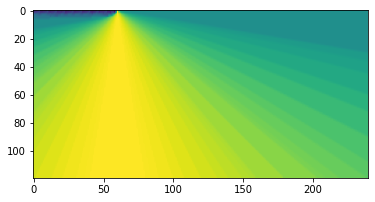

In [255]:
plt.imshow(psV)

#plt.figure(figsize=[40,40])
#plt.quiver(X,Z,np.nan_to_num(psV),np.nan_to_num(psH))

In [213]:
isx = 60
ix = int(np.round(1.5*nx/5))
iz = int(np.round(nz/3))
ini = [0,isx]
fin = [psV[ix,iz],psH[ix,iz]]
print(fin)

[0.0009608279654492805, -0.000279793763820535]


(0.0, 1.0)

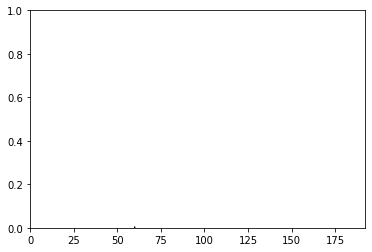

In [214]:
plt.arrow(isx,0,psH[ix,iz],psV[ix,iz])
plt.xlim(x[0],x[-1])
plt.ylim(z[0],1)

In [215]:
ini

[0, 60]

In [216]:
ix

72

In [217]:
fin

[0.0009608279654492805, -0.000279793763820535]

In [225]:
isx = 20
ix = 20
iz = 30

psV,psH,prV,prH = peso(TTh,dt,60,isx)

print((z[iz]-0)/(x[ix]-x[isx]))

inf


<ipython-input-225-812e8b6d69c8>:7: RuntimeWarning: divide by zero encountered in double_scalars
  print((z[iz]-0)/(x[ix]-x[isx]))


In [226]:
print(psV[iz,ix]/psH[iz,ix])

inf


<ipython-input-226-912470ac1449>:1: RuntimeWarning: divide by zero encountered in double_scalars
  print(psV[iz,ix]/psH[iz,ix])


In [227]:
psV2 = np.diff(TTh[:,:,:], axis=1)
psH2 = np.diff(TTh[:,:,:], axis=2)
print(psV2[isx,iz,ix]/psH2[isx,iz,ix])

12.082762530298384


In [228]:
(TTh[isx,iz,ix]-TTh[isx,iz-1,ix])/(TTh[isx,iz,ix]-TTh[isx,iz,ix-1])

-12.082762530298384

In [197]:
TTh.shape

(240, 120, 240)

In [173]:
A = np.array([1,3,3,4,5])
print(np.diff(A))

[2 0 1 1]


In [174]:
print(TTh[isx,iz,ix]-TTh[isx,iz,ix-1])
print(psH2[isx,ix,iz])

-0.0009393905132022567
-0.0009130288521349145


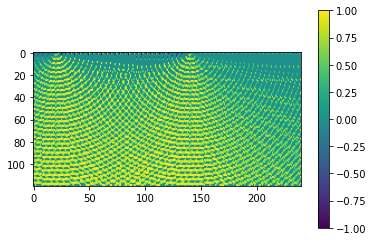

In [233]:
X = np.zeros([nz,nx])
Y = np.ones([nz,nx])
igx=20
isx=140
w=MigPreFuncoes.peso(TTh,dt,X,Y,igx,isx)
plt.imshow(w)
plt.colorbar()

In [257]:
def peso(TTh,dt,X,Y,igx,isx):
    """
    Calcula a função peso w(s,x,r)
    Entrada:
    TTh - tabela do tempo de trânsito calculada com a função raymodel3
    dt - discretização do tempo (s)
    X - componente X do modelo; X = np.sin(m_theta); X.shape = [nz,nx]
    Y - componente Y do modelo; Y = np.cos(m_theta); Y.shape = [nz,nx]
    igx - posição do receptor 
    isx - posição da fonte
    Saída:
    w - função peso (w.shape=[nz,nx])
    """
    
    #timer=np.round(TTh/dt)+1
    timer=TTh
    gH = np.gradient(timer, axis=2) #gradiente horizontal  #diferença entre colunas (do modelo de velocidade)
    gV = np.gradient(timer, axis=1) #gradiente vertical    #diferença entre linhas

    prV = gV[igx,:,:] 
    prH = gH[igx,:,:] 

    psV = gV[isx,:,:] 
    psH = gH[isx,:,:] 

    pH = psH + prH
    pV = psV + prV
    
    norma = np.sqrt(pH**2 + pV**2)

    for idx, x in np.ndenumerate(norma): #avoid nan's
        if x==0:
            norma[idx]=1e-16
            #print('oi')

    w = (pH/norma * X) + (pV/norma * Y) 
    
    return w,pH,pV,norma


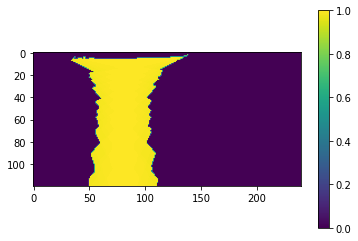

In [276]:
X = np.zeros([nz,nx])
Y = np.ones([nz,nx])
igx=20
isx=140
w,pH,pV,norma=peso(TTh,dt,X,Y,igx,isx)
mask=w>(1-0.02)
plt.imshow(w*mask)
plt.colorbar()

In [268]:
idxs.shape

(2, 16414)